### Simple approach to denoising

As a simple baseline we use thresholding algorithm with wavelet dictionary (using Haar wavelets)

$\hat{x} = D S_T(D^T z)$ ($S_T$ is hard thresholding operator)

In [1]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import skimage.io

In [2]:
def threshold(x, threshold_value):
    return x * (np.abs(x) >= threshold_value)

def threshold_coeffs(coeffs, threshold_value):
    d_a, d_rest = coeffs
    return threshold(d_a, threshold_value), [threshold(d, threshold_value) for d in d_rest]


def get_psnr(x, x_estimated):
    dynamic_range = x.max() - x.min()
    psnr_value = x.shape[0] * x.shape[1] * dynamic_range ** 2 / np.sum((x - x_estimated) ** 2)
    return 10 * np.log10(psnr_value)


def restore_image_with_wavelet_thresholding(noisy_img, threshold_value, wavelet='haar'):
    coeffs = pywt.dwt2(noisy_img, wavelet)
    thresholded_coeffs = threshold_coeffs(coeffs, threshold_value)
    return pywt.idwt2(thresholded_coeffs, wavelet)

In [3]:
url = 'https://homepages.cae.wisc.edu/~ece533/images/barbara.png'
img = skimage.io.imread(url)# / 127.5 - 1

sigma = 20
noisy_img = img + sigma * np.random.randn(*img.shape)

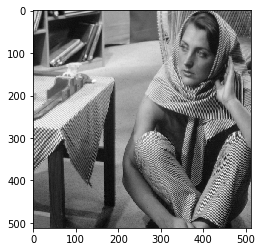

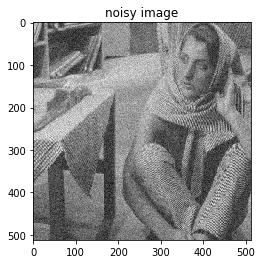

In [4]:
plt.imshow(img, cmap='gray');
plt.show()
plt.imshow(noisy_img, cmap='gray')
plt.title('noisy image');

In [5]:
threshold_values = range(0, 200)

psnr_per_threshold = [
    get_psnr(img, restore_image_with_wavelet_thresholding(noisy_img, thr))
    for thr in threshold_values
]

noisy image psnr 21.38
best threshold: 49


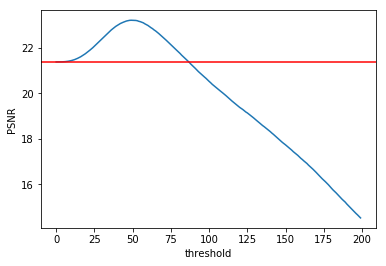

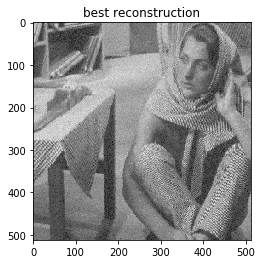

In [6]:
best_threshold_value = np.argmax(psnr_per_threshold)

print('noisy image psnr', round(get_psnr(img, noisy_img), 2))
print('best threshold:', best_threshold_value)

plt.plot(threshold_values, psnr_per_threshold)
plt.axhline(y=get_psnr(img, noisy_img), color='r', linestyle='-')
plt.xlabel('threshold')
plt.ylabel('PSNR')
plt.show()

plt.imshow(restore_image_with_wavelet_thresholding(noisy_img, best_threshold_value), cmap='gray')
plt.title('best reconstruction');